# Trying to predict whether patient with given feature would have a stroke.(Class Imbalance Problem)

In [521]:
#importing library
import numpy as np
import pandas as pd
#train_test_split
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
#tree based model
from sklearn.tree import DecisionTreeClassifier
#Support Vector Machine
from sklearn.svm import LinearSVC,SVC
#neural based model
from sklearn.neural_network import MLPClassifier
#ensemble method
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
#lightgbm
from lightgbm import LGBMClassifier
#catboost
from catboost import CatBoostClassifier
#for checking the accuracy of the dataset
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
import warnings
warnings.filterwarnings(action='ignore')
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Loading the Dataset

In [522]:
df=pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
#loading the dataset
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [523]:
plt.figure(figsize=(16,16))

df[['smoking_status','stroke']].value_counts()

smoking_status   stroke
never smoked     0         1802
Unknown          0         1497
formerly smoked  0          815
smokes           0          747
never smoked     1           90
formerly smoked  1           70
Unknown          1           47
smokes           1           42
dtype: int64

<Figure size 1152x1152 with 0 Axes>

* There is no correlation between smoking and stroke

In [524]:
df[['heart_disease','stroke']].value_counts()

heart_disease  stroke
0              0         4632
1              0          229
0              1          202
1              1           47
dtype: int64

* There is no corelation between heart disease and brain stroke

# Role of Work type on brain stroke

In [525]:
df[['work_type','stroke']].value_counts()

work_type      stroke
Private        0         2776
Self-employed  0          754
children       0          685
Govt_job       0          624
Private        1          149
Self-employed  1           65
Govt_job       1           33
Never_worked   0           22
children       1            2
dtype: int64

In [526]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [527]:
(819*100)/(2925+819)

21.875

In [528]:
(65*100)/(65+149)

30.373831775700936

In [529]:
(657*100)/(2925+657)

18.34170854271357

In [530]:
(33*100)/(33+149)

18.13186813186813

In [531]:
(2925*100)/(2925+819)

78.125

In [532]:
(149*100)/(65+149)

69.62616822429906

In [533]:
(2925*100)/(2925+657)

81.65829145728644

In [534]:
(149*100)/(33+149)

81.86813186813187

# * Private Employee has more chance of getting stroke than Government Employees
# * Self Employed has more chance of getting stroke then Private Employees

# Effect of Living Area on Stroke

In [535]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [536]:
df[['Residence_type','stroke']].value_counts()

Residence_type  stroke
Urban           0         2461
Rural           0         2400
Urban           1          135
Rural           1          114
dtype: int64

In [537]:
(2514*100)/(2596+2514)

49.19765166340509

In [538]:
(114*100)/(135+114)

45.78313253012048

# People living in Rural Area has less likely to get stroke

# Univariant Analysis

<AxesSubplot:xlabel='gender', ylabel='count'>

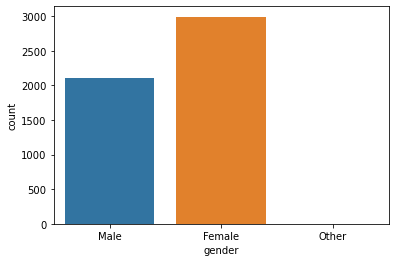

In [539]:
sns.countplot(x='gender',data=df)

<AxesSubplot:xlabel='gender', ylabel='count'>

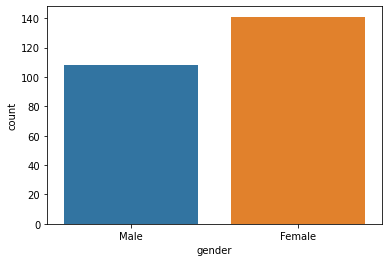

In [540]:
strokes=df[df['stroke']==1]
sns.countplot(x='gender',data=strokes)

In [541]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [542]:
strokes['gender'].value_counts()

Female    141
Male      108
Name: gender, dtype: int64

In [543]:
(2994*100)/(2994+2115)

58.60246623605402

In [544]:
(141*100)/(141+108)

56.626506024096386

# Female has less chances of getting strokes than man

# Effect of Married on Strokes

In [545]:
df[['gender','ever_married','stroke']].value_counts()

gender  ever_married  stroke
Female  Yes           0         1881
Male    Yes           0         1252
Female  No            0          972
Male    No            0          755
Female  Yes           1          120
Male    Yes           1          100
Female  No            1           21
Male    No            1            8
Other   No            0            1
dtype: int64

In [546]:
married_stroke=df[df['ever_married']=='Yes'][df['stroke']==1]
married=df[df['ever_married']=='Yes']

In [547]:
married_stroke[['gender','ever_married','stroke']].value_counts()

gender  ever_married  stroke
Female  Yes           1         120
Male    Yes           1         100
dtype: int64

In [548]:
married['gender'].value_counts()

Female    2001
Male      1352
Name: gender, dtype: int64

In [549]:
married_man_total=(1352*100)/(2001+1352)

In [550]:
married_man_stroke=(100*100)/(100+120)

In [551]:
married_man_stroke-married_man_total

5.132445842257951

# Married man has more likely to have stroke than married woman

In [552]:
unmarried_stroke=df[df['ever_married']=='No'][df['stroke']==1]
unmarried=df[df['ever_married']=='No']

In [553]:
unmarried_stroke[['gender','ever_married','stroke']].value_counts()

gender  ever_married  stroke
Female  No            1         21
Male    No            1          8
dtype: int64

In [554]:
unmarried['gender'].value_counts()

Female    993
Male      763
Other       1
Name: gender, dtype: int64

In [555]:
unmarried_man_total=(763*100)/(993+763)

In [556]:
unmarried_woman_total=(993*100)/(993+763)
unmarried_woman_total

56.54897494305239

In [557]:
unmarried_woman_stroke=(21*100)/(21+8)
unmarried_woman_stroke

72.41379310344827

In [558]:
unmarried_woman_stroke-unmarried_woman_total

15.864818160395878

In [559]:
unmarried_man_total

43.45102505694761

In [560]:
unmarried_man_stroke=(8*100)/(21+8)
unmarried_man_stroke

27.586206896551722

In [561]:
unmarried_man_stroke-unmarried_man_total

-15.864818160395885

In [562]:
unmarried_man_stroke-unmarried_man_total

-15.864818160395885

# Unmarried man has less chance of stroke than unmarried woman

# Marriage Increase the chance of Stroke in Man while decrease the chance of strokes in woman

* Unnmarried man has less likely to get stroke than married man

In [563]:
strokes[['gender','ever_married','stroke']].value_counts()

gender  ever_married  stroke
Female  Yes           1         120
Male    Yes           1         100
Female  No            1          21
Male    No            1           8
dtype: int64

In [564]:
#importing library
import numpy as np
import pandas as pd
#train_test_split
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
#tree based model
from sklearn.tree import DecisionTreeClassifier
#Support Vector Machine
from sklearn.svm import LinearSVC,SVC
#neural based model
from sklearn.neural_network import MLPClassifier
#ensemble method
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
#lightgbm
from lightgbm import LGBMClassifier
#catboost
from catboost import CatBoostClassifier
#for checking the accuracy of the dataset
from sklearn.metrics import accuracy_score,f1_score
import warnings
warnings.filterwarnings(action='ignore')
#visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [565]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Getting Information about the dataset

In [566]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [567]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [568]:
def onehot_encode(df,column):
    df=df.copy()
    dummies=pd.get_dummies(df[column],prefix=column)
    df=pd.concat([df,dummies],axis=1)
    df=df.drop(column,axis=1)
    return df

In [569]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [570]:
def preprocess_input(df):
    df=df.copy()
    #dropping the id columns 
    df=df.drop('id',axis=1)
    
    df['ever_married']=df['ever_married'].replace({'Yes':1,'No':0})
    df['Residence_type']=df['Residence_type'].replace({'Urban':1,'Rural':0})
    onehot_columns=['gender','work_type','smoking_status']
    for column in onehot_columns:
        df=onehot_encode(df,column)
    y=df['stroke']
    x=df.drop('stroke',axis=1)
    #train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)
    imputer=KNNImputer()
    imputer.fit(x_train)
    x_train=pd.DataFrame(imputer.transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(imputer.transform(x_test),columns=x_test.columns)
    
    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
    
    
    
    
    
    
    
    return x_train,x_test,y_train,y_test

In [571]:
x_train,x_test,y_train,y_test=preprocess_input(df)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3577, 19)
(1533, 19)
(3577,)
(1533,)


In [572]:
x_train.isna().sum()

age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
gender_Female                     0
gender_Male                       0
gender_Other                      0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [573]:
models={'Logistic Regression':LogisticRegression(),
       'K-Nearest Neighbors':KNeighborsClassifier(),
       'Decision Tree':DecisionTreeClassifier(),
       'Support Vector Machine(Linear Kernel)':LinearSVC(),
       'Neural Network':MLPClassifier(),
       'Random Forest':RandomForestClassifier(),
       'Gradient Boosting':GradientBoostingClassifier(),
       'XGBoost':XGBClassifier(eval_metrics='mlogloss'),
       'LightGBM':LGBMClassifier(),
       'CatBoost':CatBoostClassifier()}


In [574]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print(name)
    print(model.score(x_test,y_test))

Logistic Regression
0.9523809523809523
K-Nearest Neighbors
0.9458577951728636
Decision Tree
0.9073711676451403
Support Vector Machine(Linear Kernel)
0.9530332681017613
Neural Network
0.9471624266144814
Random Forest
0.9497716894977168
Gradient Boosting
0.9530332681017613
[07:29:04] WARNING: ../src/learner.cc:627: 
Parameters: { "eval_metrics" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


XGBoost
0.9465101108936725
LightGBM
0.949119373776908
Learning rate set to 0.017754
0:	learn: 0.6668578	total: 5.8ms	remaining: 5.8s
1:	learn: 0.6424087	total: 8.47ms	remaining: 4.22s
2:	learn: 0.6189746	total: 10.6ms	remaining: 3.51s
3:	learn: 0.5969441	total: 12.7ms	remaining: 3.17s
4:	learn: 0.5738246	total: 15.4ms	remaining: 3.06s
5:	learn: 0.5490565	total: 1

# Handling Class Imbalance with OverSampling

In [575]:
oversampled_data=pd.concat([x_train,y_train],axis=1).copy()
num_samples=y_train.value_counts()[0]-y_train.value_counts()[1]
new_samples=oversampled_data.query('stroke==1').sample(num_samples,replace=True,random_state=1)
oversampled_data=pd.concat([oversampled_data,new_samples],axis=0).sample(frac=1.0,random_state=1).reset_index(drop=True)


In [576]:
oversampled_data=oversampled_data.dropna().reset_index(drop=True)

In [577]:
oversampled_data['stroke'].value_counts()

1.0    3400
0.0    2312
Name: stroke, dtype: int64

In [578]:
y=oversampled_data['stroke']
x=oversampled_data.drop('stroke',axis=1)

In [579]:
sampled_xtrain,sampled_xtest,sampled_ytrain,sampled_ytest=train_test_split(x,y,train_size=0.7,random_state=1)

In [580]:
for name,model in models.items():
    model.fit(sampled_xtrain,sampled_ytrain)
    print(name)
    print(model.score(sampled_xtest,sampled_ytest))
    print(model.score(x_test,y_test))

Logistic Regression
0.5962660443407235
0.24070450097847357
K-Nearest Neighbors
0.8815635939323221
0.6829745596868885
Decision Tree
0.9673278879813302
0.8741030658838878
Support Vector Machine(Linear Kernel)
0.5962660443407235
0.23939986953685582
Neural Network
0.867561260210035
0.7038486627527724
Random Forest
0.9871645274212368
0.9249836921069797
Gradient Boosting
0.7893815635939323
0.4794520547945205
[07:29:19] WARNING: ../src/learner.cc:627: 
Parameters: { "eval_metrics" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


XGBoost
0.9626604434072346
0.8747553816046967
LightGBM
0.9527421236872812
0.8310502283105022
Learning rate set to 0.018617
0:	learn: 0.6900354	total: 3.17ms	remaining: 3.17s
1:	learn: 0.6874287	total: 6.41ms	remaining: 3.2s
2:	lear

* Random Forest is the best Performing Model with Class Imbalance

In [581]:
x_train.isna().sum()

age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
gender_Female                     0
gender_Male                       0
gender_Other                      0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [582]:
y_train=oversampled_data['stroke']
x_train=oversampled_data.drop('stroke',axis=1)

In [583]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5712, 19)
(1533, 19)
(5712,)
(1533,)


In [584]:
x_train.isna().sum().sum()

0

In [585]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print(name)
    print(model.score(x_test,y_test))

Logistic Regression
0.21395955642530984
K-Nearest Neighbors
0.7592954990215264
Decision Tree
0.8864970645792564
Support Vector Machine(Linear Kernel)
0.21135029354207435
Neural Network
0.6908023483365949
Random Forest
0.9399869536855838
Gradient Boosting
0.4827136333985649
[07:29:39] WARNING: ../src/learner.cc:627: 
Parameters: { "eval_metrics" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


XGBoost
0.9008480104370515
LightGBM
0.8538812785388128
Learning rate set to 0.021681
0:	learn: 0.6888207	total: 3.68ms	remaining: 3.68s
1:	learn: 0.6856856	total: 7.18ms	remaining: 3.58s
2:	learn: 0.6827759	total: 10.1ms	remaining: 3.37s
3:	learn: 0.6775482	total: 12.8ms	remaining: 3.19s
4:	learn: 0.6743089	total: 15.2ms	remaining: 3.03s
5:	learn: 0.6718742	tot

# Checking for Null value in df data

In [586]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Checking the Unique value in each object columns

In [587]:
{column:list(df[column].unique()) for column in df.columns if df[column].dtypes=='object'}

{'gender': ['Male', 'Female', 'Other'],
 'ever_married': ['Yes', 'No'],
 'work_type': ['Private',
  'Self-employed',
  'Govt_job',
  'children',
  'Never_worked'],
 'Residence_type': ['Urban', 'Rural'],
 'smoking_status': ['formerly smoked', 'never smoked', 'smokes', 'Unknown']}

In [588]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [589]:
100-(249*100)/(249+4861)

95.12720156555773

In [590]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [591]:
cm=confusion_matrix(y_test,y_pred)

In [592]:
cm

array([[1442,   19],
       [  72,    0]])

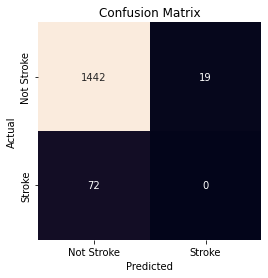

In [593]:
#ploting confusion matrix 
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True,fmt='g',cbar=False)
plt.xticks(np.arange(2)+0.5,['Not Stroke','Stroke'])
plt.yticks(np.arange(2)+0.5,['Not Stroke','Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [594]:
model.fit(sampled_xtrain,sampled_ytrain)
y_pred=model.predict(x_test)

In [595]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1416,   45],
       [  72,    0]])

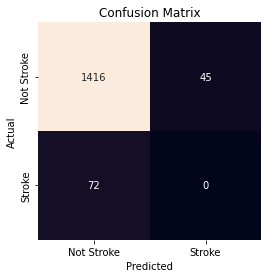

In [596]:
#ploting confusion matrix 
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True,fmt='g',cbar=False)
plt.xticks(np.arange(2)+0.5,['Not Stroke','Stroke'])
plt.yticks(np.arange(2)+0.5,['Not Stroke','Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Self Employed are more likely to get stroke are compared to government and private employees